In [1]:
from transformers import PreTrainedModel
from OmicsConfig import OmicsConfig
from transformers import PretrainedConfig, PreTrainedModel
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Batch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch_geometric.utils import negative_sampling
from torch.nn.functional import cosine_similarity
from torch.optim.lr_scheduler import StepLR

/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from MultiOmicsGraphAttentionAutoencoderModel import MultiOmicsGraphAttentionAutoencoderModel

In [3]:
autoencoder_config = OmicsConfig.from_pretrained("./lc_models/MultiOmicsAutoencoder/trained_autoencoder/")
autoencoder_model = MultiOmicsGraphAttentionAutoencoderModel(autoencoder_config)

In [4]:
!huggingface-cli whoami

VatsalPatel18


In [5]:
# autoencoder_model.push_to_hub("VatsalPatel18/HNSCC-MultiOmics-Graph-Attention-Autoencoder", use_temp_dir=True)
# autoencoder_config.push_to_hub("VatsalPatel18/HNSCC-MultiOmics-Graph-Attention-Autoencoder", use_temp_dir=True)

In [6]:
autoencoder_model.encoder

GATv2EncoderModel(
  (layers): ModuleList(
    (0): GATv2Conv(17, 1, heads=1)
    (1): GATv2Conv(1, 1, heads=1)
  )
)

In [7]:
from Attention_Extracter import Attention_Extracter

In [8]:
graph_data_dict_path = './data/graph_data_dictN.pth'

In [24]:
extracter = Attention_Extracter(graph_data_dict_path, autoencoder_model.encoder, gpu=False)

In [10]:
from GraphAnalysis import GraphAnalysis

In [11]:
# import torch

In [12]:
ga = GraphAnalysis(extracter)

In [13]:
# ga.latentF = ga.latentF.T

In [14]:
ga.latentF.shape

(426, 2784)

In [26]:
ga.latentF

array([[0.75913864, 0.7530172 , 0.7552683 , ..., 0.7564664 , 0.75646687,
        0.75527316],
       [0.7845995 , 0.77783346, 0.77900416, ..., 0.77567637, 0.775681  ,
        0.7808896 ],
       [0.75882256, 0.7544105 , 0.75604266, ..., 0.75131047, 0.7513118 ,
        0.75679255],
       ...,
       [0.7489519 , 0.74192566, 0.7456367 , ..., 0.7401773 , 0.7401774 ,
        0.7459446 ],
       [0.75043863, 0.7379235 , 0.73696154, ..., 0.7235672 , 0.72356784,
        0.73845434],
       [0.7649641 , 0.7552157 , 0.7574192 , ..., 0.74973565, 0.7497361 ,
        0.75909853]], dtype=float32)

In [17]:
import matplotlib.pyplot as plt

/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

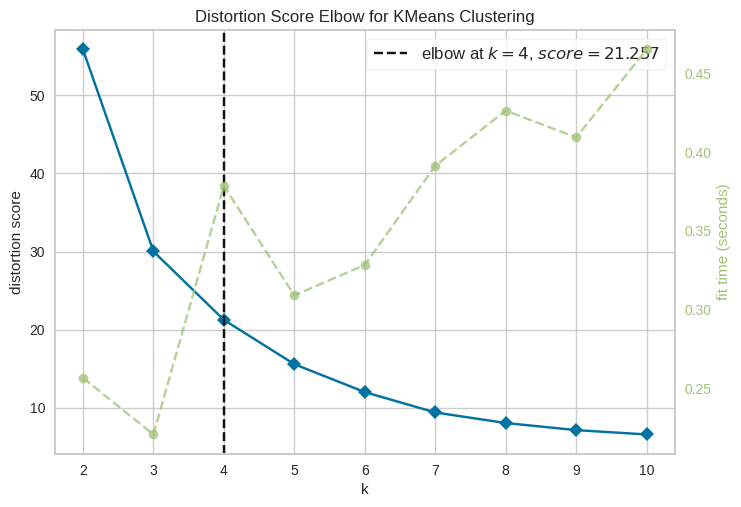

In [25]:
ga.find_optimal_clusters(save_path='temp')
# plt.savefig('temp.png',dpi=200)

In [84]:
ga.cluster_data2(4)

/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
ga.pca_tsne()

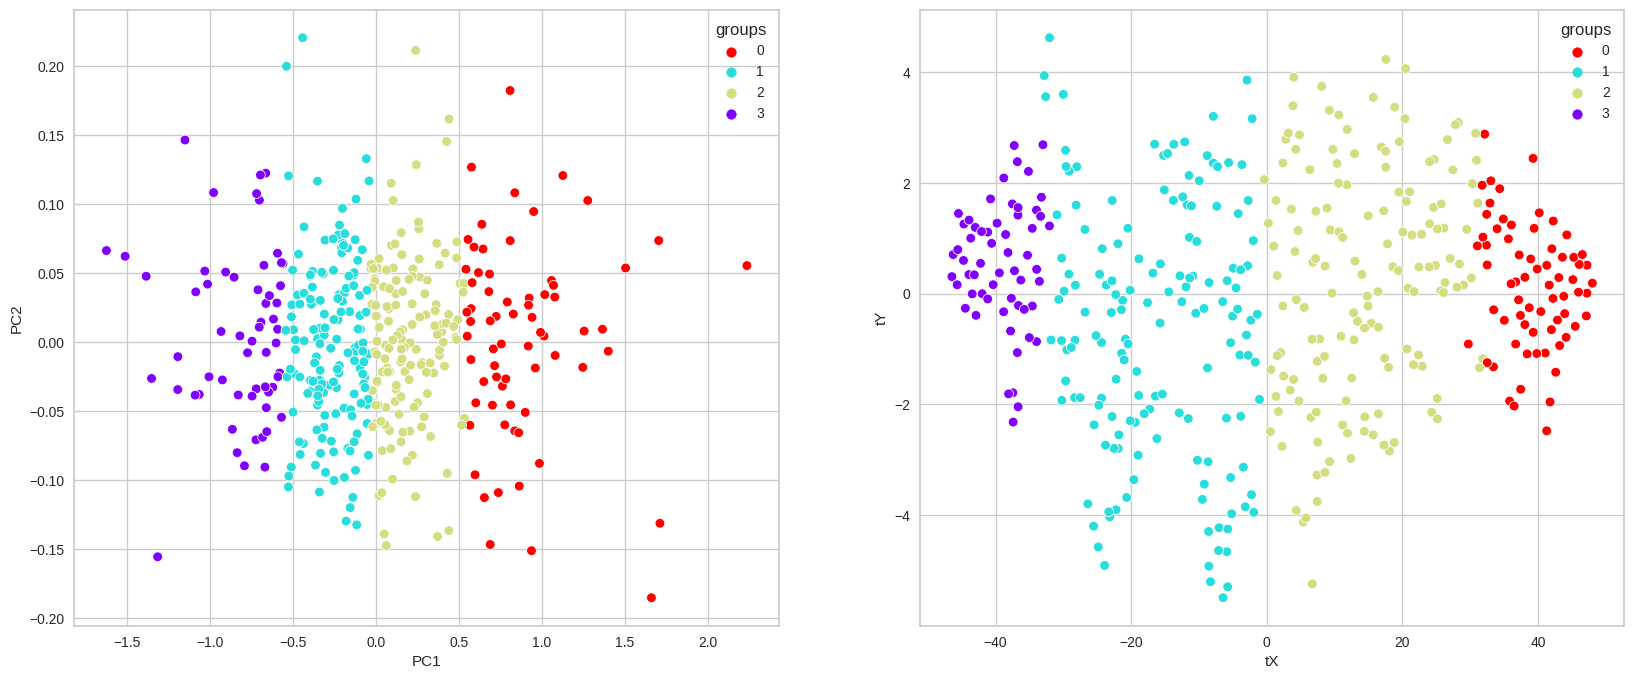

In [86]:
ga.visualize_clusters()

/home/gp7/packages_v2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


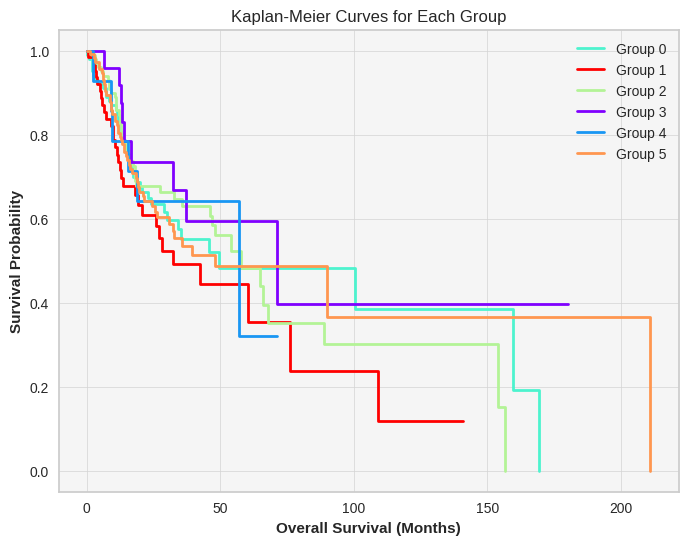

In [88]:
ga.cluster_data2(6)
ga.plot_kaplan_meier()

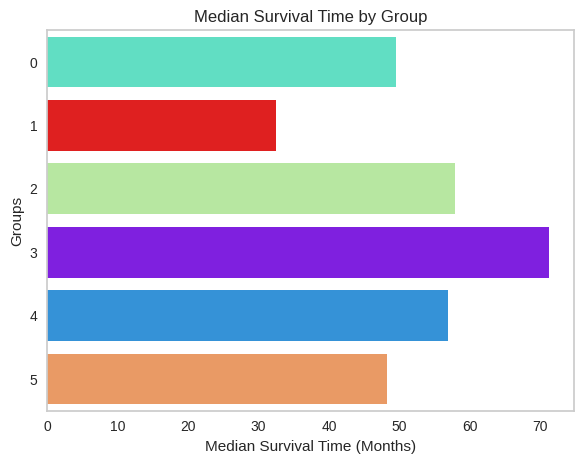

In [89]:
ga.plot_median_survival_bar(name='temp')

In [90]:
ga.perform_log_rank_test()

[]

In [91]:
ga.perform_log_rank_test()
ga.generate_summary_table()

,Total number of patients,Alive,Deceased,Median survival time
2,104,60,44,57.928132
3,25,16,9,71.210179
5,116,67,49,48.196732
0,102,59,43,49.446033
1,64,34,30,32.481836
4,15,9,6,56.941842


In [68]:
# ga.club_two_groups(0,2)

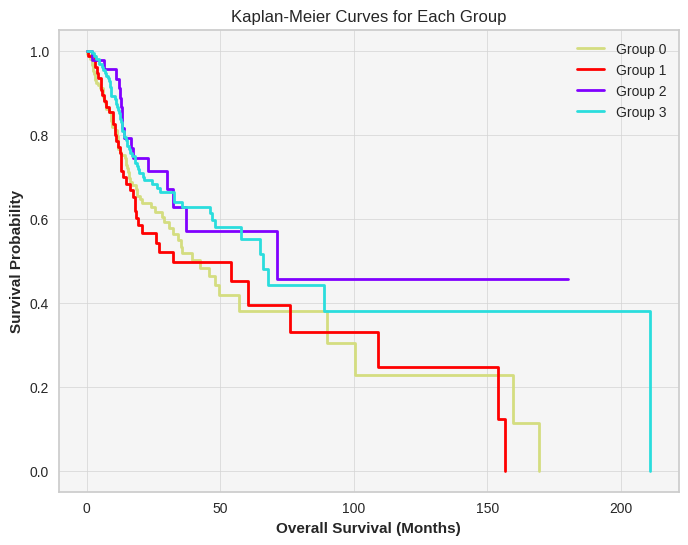

In [69]:
ga.plot_kaplan_meier(name='temp_k3_club')

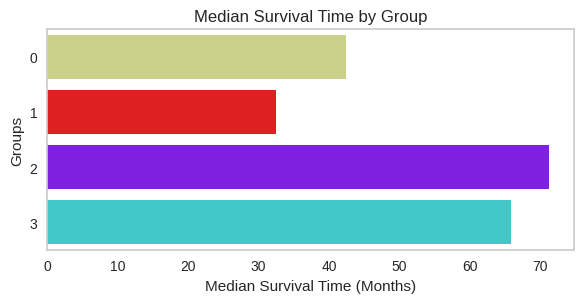

In [70]:
ga.plot_median_survival_bar(name='temp')

In [71]:
ga.club_two_groups(0,3)

In [72]:
ga.perform_log_rank_test()
ga.generate_summary_table()

,Total number of patients,Alive,Deceased,Median survival time
0,302,176,126,56.941842
2,46,30,16,71.210179
1,78,39,39,32.481836


In [75]:
ga.perform_log_rank_test()

[]

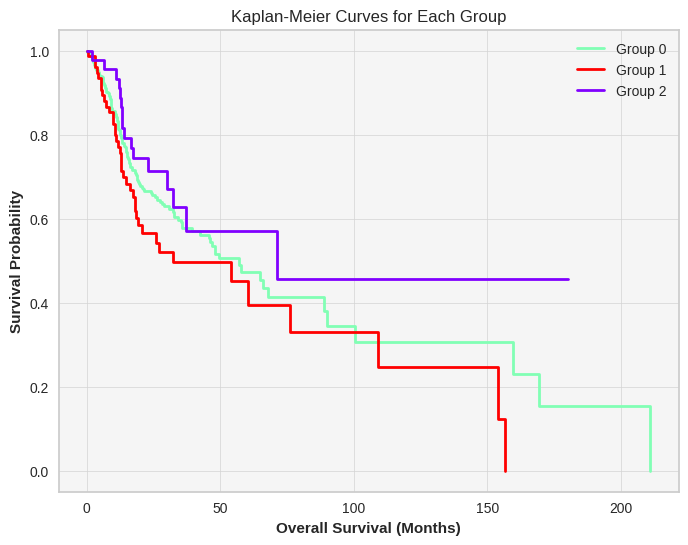

In [76]:
ga.plot_kaplan_meier(name='temp_k3_club')